In [99]:
import pandas as pd
import numpy as np

In [100]:
df= pd.read_csv('../Machine_Learning/Iris.csv')

In [101]:
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [102]:
df.iloc[:,1:]

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]

In [103]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [104]:
df['Species']=le.fit_transform(df['Species'])
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0

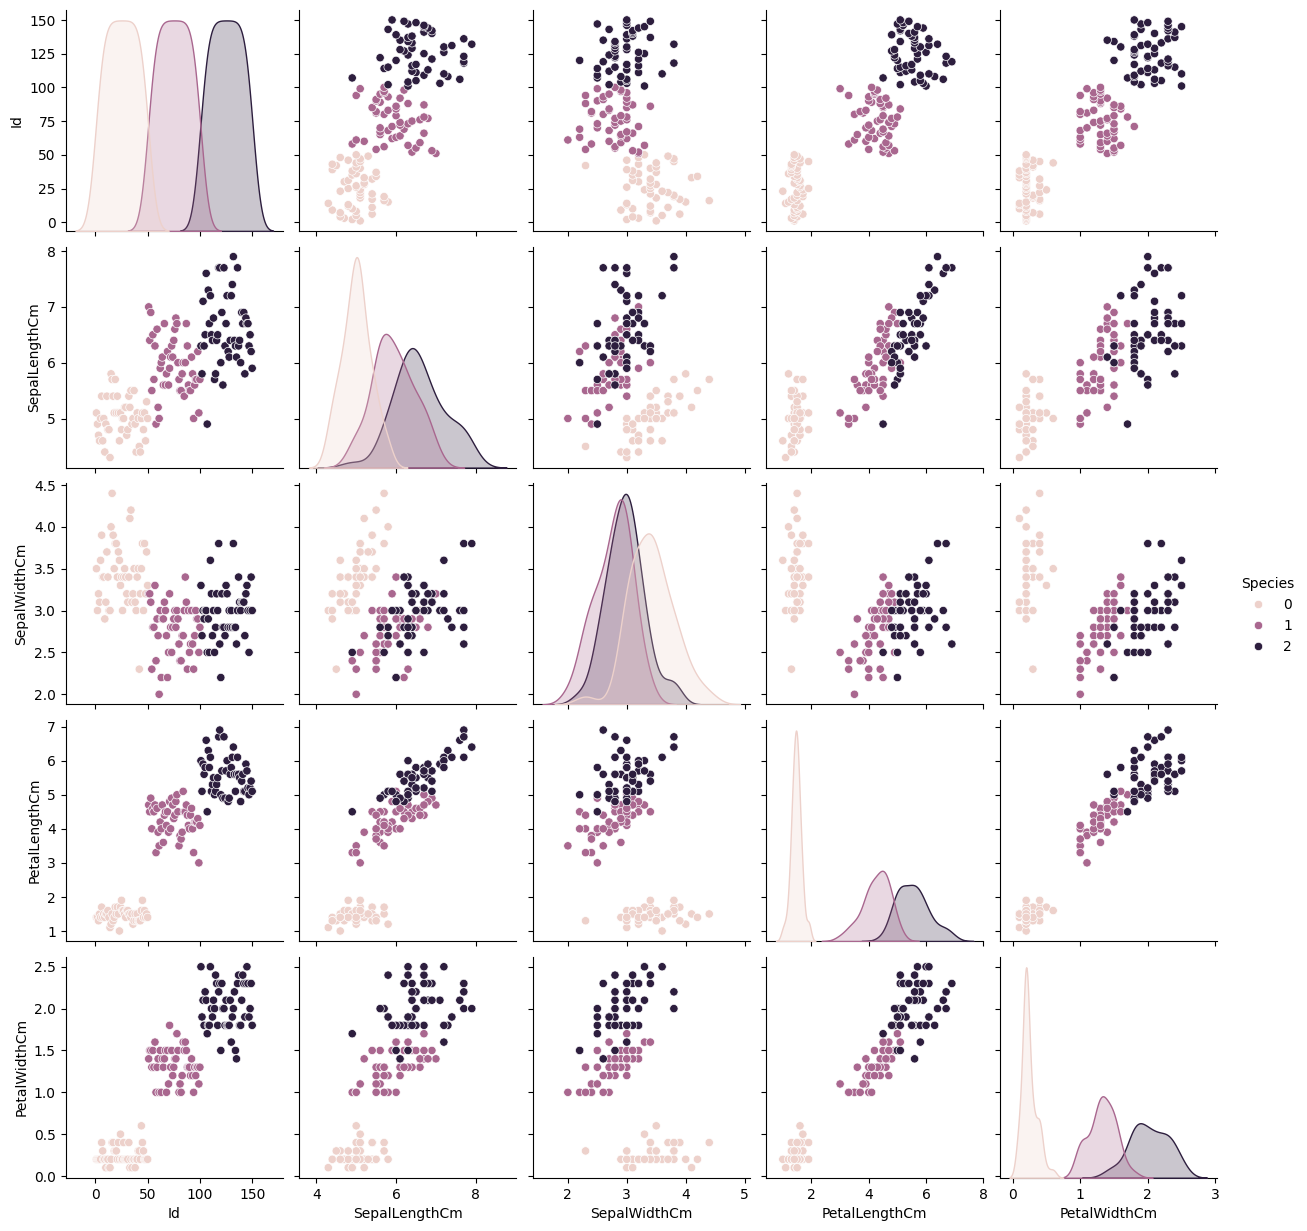

In [105]:
import seaborn as sns
sns.pairplot(df, hue='Species')

In [106]:
new_df=df[df['Species']!=0][['SepalLengthCm', 'SepalWidthCm', 'Species']]

In [107]:
new_df.head()

SepalLengthCm  SepalWidthCm  Species
50            7.0           3.2        1
51            6.4           3.2        1
52            6.9           3.1        1
53            5.5           2.3        1
54            6.5           2.8        1

In [108]:
X= new_df.iloc[:,:2]
y= new_df.iloc[:,-1]

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [110]:
clf1= LogisticRegression()
clf2= KNeighborsClassifier()
clf3= RandomForestClassifier()

In [111]:
estimators = [('lr',clf1),('knn',clf2),('rf',clf3)]

In [112]:
for estimator in estimators:
    scores = cross_val_score(estimator[1], X, y, cv=10, scoring='accuracy')
    print(estimator[0], np.round(np.mean(scores),2))

lr 0.75
knn 0.62
rf 0.6


In [113]:
from sklearn.ensemble import VotingClassifier

## Hard Voting

In [114]:
vc= VotingClassifier(estimators=estimators)
x=cross_val_score(vc, X, y, cv=10, scoring='accuracy')
print('Voting Classifier(Hard)', np.round(np.mean(x),2))

Voting Classifier(Hard) 0.68


## Soft Voting

In [115]:
vc = VotingClassifier(estimators=estimators, voting='soft')
x=cross_val_score(vc, X, y, cv=10, scoring='accuracy')
print('Voting Classifier(Soft)', np.round(np.mean(x),2))

Voting Classifier(Soft) 0.65


## Weighted Voting

In [116]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))

for i=1,j=1,k=1 0.64
for i=1,j=1,k=2 0.62
for i=1,j=1,k=3 0.62
for i=1,j=2,k=1 0.64
for i=1,j=2,k=2 0.63
for i=1,j=2,k=3 0.64
for i=1,j=3,k=1 0.66
for i=1,j=3,k=2 0.63
for i=1,j=3,k=3 0.63
for i=2,j=1,k=1 0.68
for i=2,j=1,k=2 0.66
for i=2,j=1,k=3 0.64
for i=2,j=2,k=1 0.68
for i=2,j=2,k=2 0.65
for i=2,j=2,k=3 0.63
for i=2,j=3,k=1 0.66
for i=2,j=3,k=2 0.65
for i=2,j=3,k=3 0.64
for i=3,j=1,k=1 0.71
for i=3,j=1,k=2 0.7
for i=3,j=1,k=3 0.65
for i=3,j=2,k=1 0.69
for i=3,j=2,k=2 0.66
for i=3,j=2,k=3 0.65
for i=3,j=3,k=1 0.7
for i=3,j=3,k=2 0.64
for i=3,j=3,k=3 0.65


## Using the same Algorithm(Hyperparameter Approach for one algo with different parameters)

In [117]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [118]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93
